# Model Building and Evaluation

This module focuses on model building and diagnosis. 

In [1]:
import pandas as pd
import numpy as np

#import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# This displays the [plots] in the boxes below the cells
%matplotlib inline


/Users/rajesh/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Read the cleaned dataset from disk.

In [2]:
ADS = pd.read_csv(r'./ADS_S.csv')
#print and check the content
ADS

,Unnamed: 0,Category,title
0,0,Amazon Launchpad,Watch Ya' Mouth Family Edition - The Authentic...
1,1,Amazon Launchpad,SmartyPants Kids Complete Gummy Vitamins: Mult...
2,2,Amazon Launchpad,Anova Culinary PCB-120US-K1 Bluetooth Precisio...
3,3,Amazon Launchpad,Joking Hazard
4,4,Amazon Launchpad,Tile Mate - Key Finder. Phone Finder. Anything...
5,5,Amazon Launchpad,"Soylent Ready to Drink Food, Original, 14 oz B..."
6,6,Amazon Launchpad,TubShroom The Revolutionary Tub Drain Protecto...
7,7,Amazon Launchpad,iOttie Easy One Touch 3 (V2.0) Car Mount Unive...
8,8,Amazon Launchpad,YETI Rambler Stainless Steel Vacuum Insulated ...
9,9,Amazon Launchpad,TubShroom The Revolutionary Tub Drain Protecto...


Frequency Distribution of Different Category.

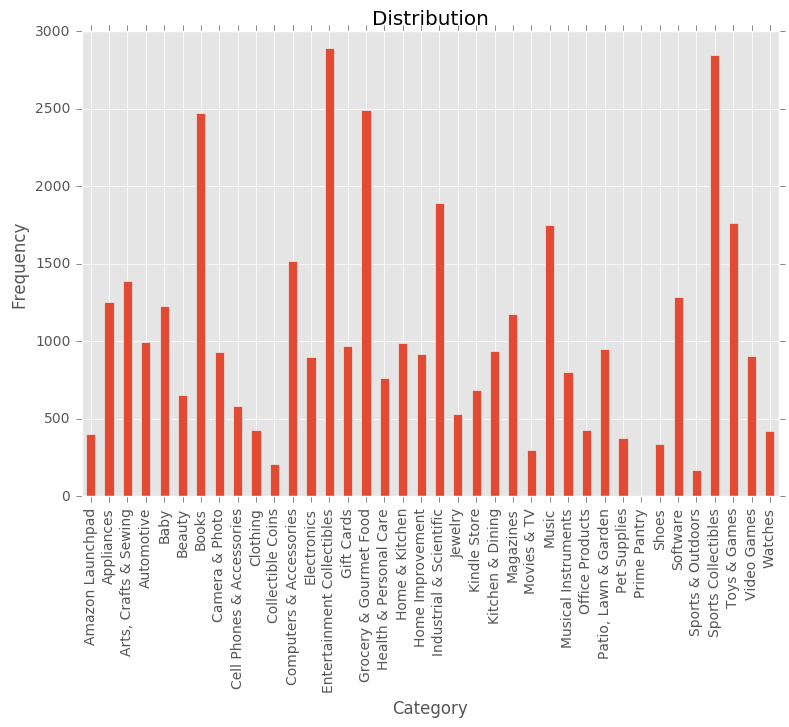

In [3]:
#Get frequency distribution of category
freq = ADS.groupby('Category').title.count()

fig = plt.figure(figsize=(9,6)) 

freq.plot(kind='bar')
plt.title('Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.show()

#ADS.Category.value_counts()

Removing "Prime Pantry" category, since there are only 6 listings available in the data. 

In [4]:
#dropping prime pantry
ADS = ADS[ADS.Category != 'Prime Pantry']
ADS.Category.value_counts()

Entertainment Collectibles    2890
Sports Collectibles           2850
Grocery & Gourmet Food        2492
Books                         2471
Industrial & Scientific       1892
Toys & Games                  1766
Music                         1750
Computers & Accessories       1518
Arts, Crafts & Sewing         1389
Software                      1289
Appliances                    1256
Baby                          1231
Magazines                     1176
Automotive                     998
Home & Kitchen                 987
Gift Cards                     968
Patio, Lawn & Garden           954
Kitchen & Dining               939
Camera & Photo                 930
Home Improvement               918
Video Games                    906
Electronics                    898
Musical Instruments            803
Health & Personal Care         762
Kindle Store                   686
Beauty                         654
Cell Phones & Accessories      584
Jewelry                        533
Office Products     

# Dividing the data into Training and Testing
<p></p>
<p>
<li> The data is divided into two samples with 70% of data for Training sample and 30% for testig.</li>
<li> Stratifed sampling technique is used, to maintain the proportions of categoires. </li>
</p>

In [5]:
from sklearn.cross_validation import train_test_split

text_train, text_test, y_train, y_test = train_test_split(ADS.title, ADS.Category, random_state=100, test_size=0.30,\
                                                          stratify=ADS.Category)


Checking the sample sie of both train and test samples. 

In [6]:
print text_train.shape, y_train.shape
print text_test.shape, y_test.shape

(27696,) (27696,)
(11870,) (11870,)


Check the stratification.

In [7]:
fracs_test = y_train.value_counts()/y_train.shape*100
fracs_train = y_test.value_counts()/y_test.shape*100

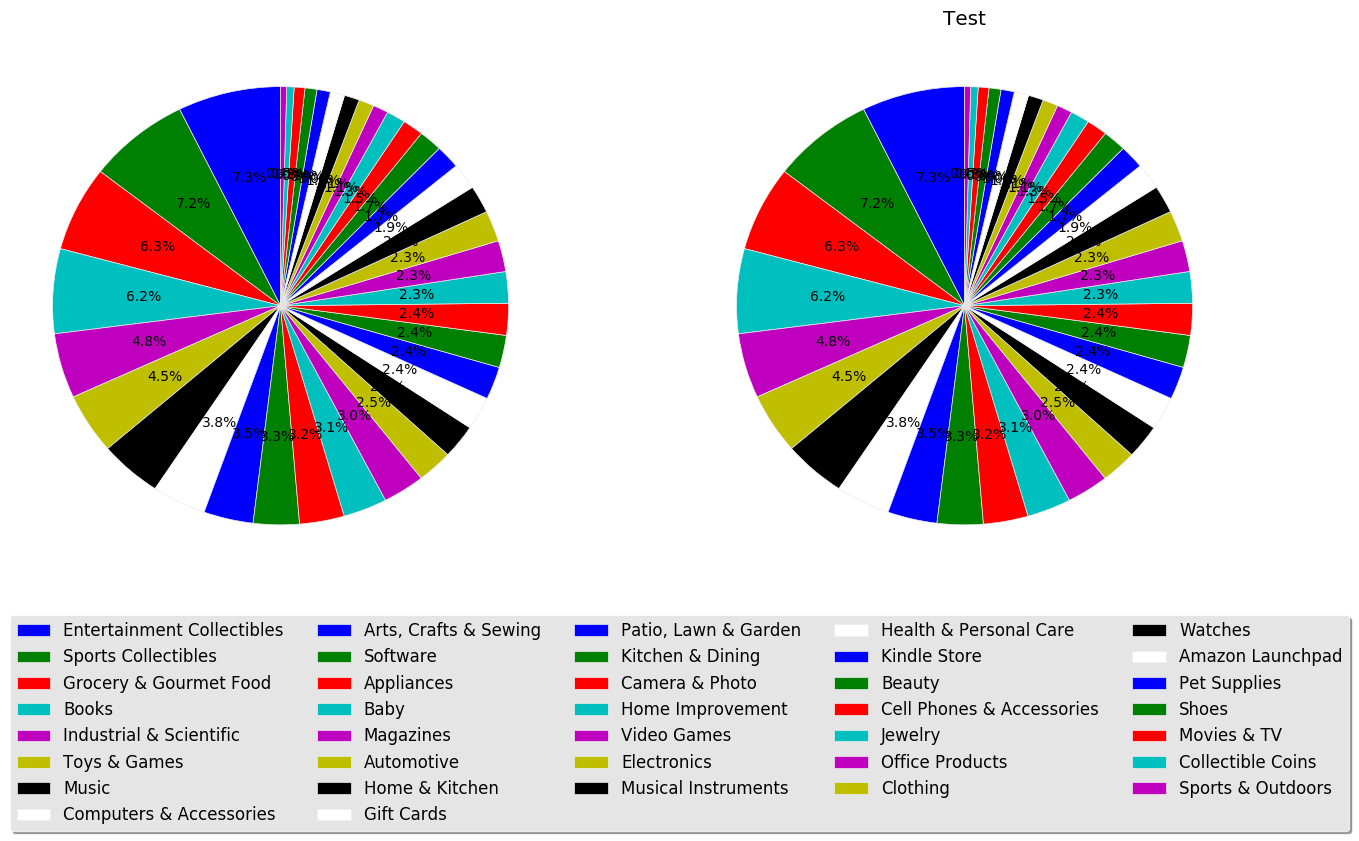

In [8]:
import numpy as np

plt.figure(1, figsize= (6,6))
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)

# Plot
plt.pie(fracs_train,  autopct='%1.1f%%', 
        shadow=False, startangle=90, center = (-1.5,0))

plt.title('Test')

plt.figure(1, figsize= (6,6))

plt.pie(fracs_test, autopct='%1.1f%%', 
        shadow=False, startangle=90, center = (1.5,0))

#plt.title('Training dataset category distribution'+ \t  \\t Testing dataset category distribution')

plt.legend(y_train.value_counts().index, loc='upper center', bbox_to_anchor=(0, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.tight_layout()
plt.show()


1. Create a pipeline for pre-processing (TD-IDF for the k-Folds before validating the hyper parameters)
2. Brute force for hyper parameter tuning [Underfitting vs Overfitting]

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline = make_pipeline(StemmedTfidfVectorizer(),\
                         LogisticRegression(solver='newton-cg', max_iter=50000, multi_class='multinomial'))

#pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
#pipeline.fit(text_train, y_train)
#pipeline.score(text_test, y_test)

params = {'logisticregression__C': [.001, .1, 1, 10, 100, 1000], \
          'logisticregression__penalty':['l2'], "stemmedtfidfvectorizer__ngram_range": [(1, 1), (1, 2), (2, 2)],\
          "stemmedtfidfvectorizer__stop_words": ['english',None]}

grid = GridSearchCV(pipeline, param_grid=params, cv=3, verbose = 3, n_jobs=3) # scoring="roc_auc" used for unbalanced class
grid.fit(text_train, y_train)



Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] logisticregression__C=0.001, stemmedtfidfvectorizer__ngram_range=(1, 1), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english 
[CV] logisticregression__C=0.001, stemmedtfidfvectorizer__ngram_range=(1, 1), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english 
[CV] logisticregression__C=0.001, stemmedtfidfvectorizer__ngram_range=(1, 1), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english 
[CV]  logisticregression__C=0.001, stemmedtfidfvectorizer__ngram_range=(1, 1), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english, score=0.098579 -  30.5s
[CV] logisticregression__C=0.001, stemmedtfidfvectorizer__ngram_range=(1, 1), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=None 
[CV]  logisticregression__C=0.001, stemmedtfidfvectorizer__ngram_range=(1, 1), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  9.0min


[CV]  logisticregression__C=0.1, stemmedtfidfvectorizer__ngram_range=(1, 2), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english, score=0.395402 - 2.1min
[CV] logisticregression__C=0.1, stemmedtfidfvectorizer__ngram_range=(1, 2), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=None 
[CV]  logisticregression__C=0.1, stemmedtfidfvectorizer__ngram_range=(1, 2), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=None, score=0.390115 - 2.2min
[CV] logisticregression__C=0.1, stemmedtfidfvectorizer__ngram_range=(2, 2), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english 
[CV]  logisticregression__C=0.1, stemmedtfidfvectorizer__ngram_range=(1, 2), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=None, score=0.387702 - 2.2min
[CV] logisticregression__C=0.1, stemmedtfidfvectorizer__ngram_range=(2, 2), logisticregression__penalty=l2, stemmedtfidfvectorizer__stop_words=english 
[CV]  logisticregressi

KeyboardInterrupt: 

In [44]:
print('best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

grid_pred = grid.predict(text_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### Stemming function to be pased to TF-IDF Vectorizer

In [10]:
import nltk.stem 
from sklearn.feature_extraction.text import TfidfVectorizer
english_stemmer = nltk.stem.SnowballStemmer('english')

#english_stemmer = EnglishStemmer.stemWords()

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


#tfidf = StemmedTfidfVectorizer(min_df=1, stop_words='english', analyzer='word', ngram_range=(1,1))
#%timeit tfidf.fit_transform(X_train)

#### Helper function to predict accuracy and Class-wise accuracy

In [11]:
def accuracy(true, pred):
    return (true == pred).sum() / float(true.shape[0])

def macro(true, pred):
    scores = []
    for l in np.unique(true):
        scores.append(accuracy(np.where(true != l, 1, 0),
                               np.where(pred != l, 1, 0)))
    return float(sum(scores)) / float(len(scores))

# Multinomial Logistic Regression

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

log_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,2), stop_words='english'), \
                         LogisticRegression(solver='newton-cg', max_iter=50000,class_weight= None, \
                                            dual= False, fit_intercept= True, intercept_scaling= 1, multi_class='multinomial',\
                                            n_jobs=2,penalty='l2', C=100))

log_pipeline.fit(text_train,y_train)
log = log_pipeline.score(text_train,y_train)
log_pred=log_pipeline.predict(text_test)


###### Serialize the pipeline object and store it in disk for future use. 

In [48]:
from sklearn.externals import joblib
filename = "./Log_models.pkl"
joblib.dump(log_pipeline, filename, compress=9)

['./Log_models.pkl']

### Model Diagnostics

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, log_pred)

array([[ 70,   1,   0, ...,   3,   2,   0],
       [  1, 334,   1, ...,   0,   0,   0],
       [  0,   0, 343, ...,   5,   0,   0],
       ..., 
       [  1,   0,  10, ..., 366,   6,   1],
       [  0,   0,   1, ...,   9, 203,   1],
       [  0,   0,   0, ...,   7,   0, 104]])

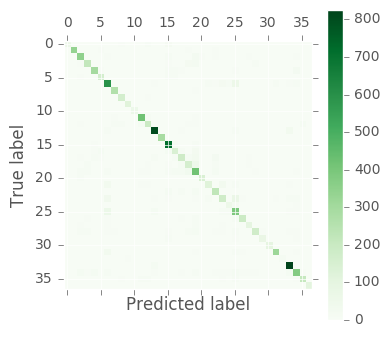

In [47]:
plt.matshow(confusion_matrix(y_test, log_pred), cmap="Greens")
plt.colorbar(shrink=1)
plt.xlabel("Predicted label")
plt.ylabel("True label");
plt.show()

In [46]:
print classification_report(y_test, log_pred)
print "****************"
print('accuracy:', accuracy(y_test, log_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, log_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.90      0.53      0.67       121
 Appliances       0.93      0.90      0.91       377
Arts, Crafts & Sewing       0.81      0.83      0.82       417
 Automotive       0.78      0.73      0.76       299
       Baby       0.85      0.80      0.83       369
     Beauty       0.77      0.82      0.80       196
      Books       0.73      0.80      0.76       741
Camera & Photo       0.88      0.95      0.91       279
Cell Phones & Accessories       0.88      0.93      0.91       175
   Clothing       0.86      0.92      0.89       129
Collectible Coins       1.00      0.95      0.98        62
Computers & Accessories       0.89      0.92      0.90       455
Electronics       0.75      0.72      0.73       269
Entertainment Collectibles       0.92      0.93      0.92       867
 Gift Cards       0.99      1.00      0.99       290
Grocery & Gourmet Food       0.85      0.95      0.90       748
Health & Personal Care

# Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,1), stop_words='english'), MultinomialNB())
nb_pipeline.fit(text_train,y_train)
nb=nb_pipeline.score(text_train,y_train)
nb_pred=nb_pipeline.predict(text_test)

from sklearn.externals import joblib
filename = "./NBmodels.pkl"
joblib.dump(nb_pipeline, filename, compress=9)

#sum(x==0 for x in pred - y_test)/len(pred)

['./NBmodels.pkl']

### Model Diagnostics 

In [18]:
confusion_matrix(y_test, nb_pred)

array([[  4,   5,   1, ...,   9,   0,   0],
       [  0, 339,   2, ...,   0,   0,   0],
       [  0,   0, 332, ...,   4,   0,   0],
       ..., 
       [  0,   1,  14, ..., 319,   0,   0],
       [  0,   1,   0, ...,  11, 139,   0],
       [  0,   1,   0, ...,  12,   0,  57]])

In [19]:
print classification_report(y_test, nb_pred)
print "****************"
print('accuracy:', accuracy(y_test, nb_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, nb_pred))

             precision    recall  f1-score   support

Amazon Launchpad       1.00      0.03      0.06       121
 Appliances       0.82      0.90      0.86       377
Arts, Crafts & Sewing       0.77      0.80      0.78       417
 Automotive       0.87      0.46      0.60       299
       Baby       0.80      0.73      0.76       369
     Beauty       0.85      0.40      0.54       196
      Books       0.56      0.84      0.67       741
Camera & Photo       0.89      0.82      0.85       279
Cell Phones & Accessories       0.87      0.75      0.81       175
   Clothing       0.94      0.62      0.75       129
Collectible Coins       1.00      0.35      0.52        62
Computers & Accessories       0.64      0.94      0.76       455
Electronics       0.71      0.57      0.63       269
Entertainment Collectibles       0.51      0.96      0.66       867
 Gift Cards       0.97      0.98      0.97       290
Grocery & Gourmet Food       0.54      0.99      0.70       748
Health & Personal Care

/Users/rajesh/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,1), stop_words='english'),\
                         RandomForestClassifier(bootstrap= True, class_weight= None, criterion= 'gini',\
                                                max_depth= 100, max_leaf_nodes=100, min_samples_leaf= 1,\
                                                min_samples_split= 1, min_weight_fraction_leaf= 0, n_estimators= 100,\
                                                n_jobs= 1, oob_score= False, random_state= None, verbose= 1, warm_start=True))
 
rf_pipeline.fit(text_train,y_train)
rf=rf_pipeline.score(text_train,y_train)

rf_pred=rf_pipeline.predict(text_test)

from sklearn.externals import joblib
filename = "./RFmodels.pkl"
joblib.dump(rf_pipeline, filename, compress=9)


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


['./RFmodels.pkl']

### Model Diagnostics

In [21]:
print classification_report(y_test, rf_pred)
print "****************"
print('accuracy:', accuracy(y_test, rf_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, rf_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.00      0.00      0.00       121
 Appliances       0.59      0.85      0.70       377
Arts, Crafts & Sewing       0.63      0.51      0.57       417
 Automotive       0.76      0.24      0.36       299
       Baby       0.74      0.57      0.65       369
     Beauty       0.47      0.21      0.29       196
      Books       0.24      0.88      0.37       741
Camera & Photo       0.66      0.81      0.73       279
Cell Phones & Accessories       0.74      0.82      0.78       175
   Clothing       0.65      0.68      0.67       129
Collectible Coins       0.94      0.71      0.81        62
Computers & Accessories       0.63      0.80      0.70       455
Electronics       0.64      0.39      0.49       269
Entertainment Collectibles       0.66      0.80      0.72       867
 Gift Cards       0.78      0.99      0.87       290
Grocery & Gourmet Food       0.46      0.91      0.61       748
Health & Personal Care

# K Nearest Neighbour

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,1), stop_words='english'),\
                         KNeighborsClassifier(neighbors=3))
 
kn_pipeline.fit(text_train,y_train)
kn=kn_pipeline.score(text_train,y_train)

kn_pred=kn_pipeline.predict(text_test)

from sklearn.externals import joblib
filename = "./KNmodels.pkl"
joblib.dump(kn_pipeline, filename, compress=9)


/Users/rajesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.
  app.launch_new_instance()


['./KNmodels.pkl']

### Model Diagnostics

In [23]:
print classification_report(y_test, kn_pred)
print "****************"
print('accuracy:', accuracy(y_test, kn_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, kn_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.88      0.40      0.55       121
 Appliances       0.91      0.60      0.72       377
Arts, Crafts & Sewing       0.85      0.35      0.50       417
 Automotive       0.87      0.28      0.42       299
       Baby       0.95      0.44      0.60       369
     Beauty       0.79      0.29      0.43       196
      Books       0.15      0.49      0.23       741
Camera & Photo       0.95      0.51      0.67       279
Cell Phones & Accessories       0.91      0.55      0.69       175
   Clothing       0.93      0.31      0.47       129
Collectible Coins       1.00      0.55      0.71        62
Computers & Accessories       0.91      0.47      0.62       455
Electronics       0.83      0.32      0.46       269
Entertainment Collectibles       0.94      0.24      0.39       867
 Gift Cards       0.98      0.90      0.94       290
Grocery & Gourmet Food       0.97      0.39      0.56       748
Health & Personal Care

# Support Vectror Machine

In [24]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

sv_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,1), stop_words='english'),\
                            SVC(C= 1.0,cache_size= 10,class_weight= None,coef0= 0.0,\
                                decision_function_shape= None,degree= 3,gamma= 100,kernel= 'rbf',\
                                max_iter= -1, probability= True,random_state=None, shrinking= True,\
                                tol= 0.001, verbose=1))

sv_pipeline.fit(text_train,y_train)
sv=sv_pipeline.score(text_train,y_train)
sv_pred=sv_pipeline.predict(text_test)

from sklearn.externals import joblib
filename = "./SVmodels.pkl"
joblib.dump(sv_pipeline, filename, compress=9)


[LibSVM]

['./SVmodels.pkl']

### Model Diagnostics

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print classification_report(y_test, sv_pred)
print "****************"
print('accuracy:', accuracy(y_test, sv_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, sv_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.80      0.03      0.06       121
 Appliances       1.00      0.08      0.14       377
Arts, Crafts & Sewing       1.00      0.00      0.01       417
 Automotive       1.00      0.00      0.01       299
       Baby       0.33      0.00      0.01       369
     Beauty       0.00      0.00      0.00       196
      Books       0.90      0.11      0.20       741
Camera & Photo       1.00      0.02      0.04       279
Cell Phones & Accessories       1.00      0.03      0.07       175
   Clothing       0.00      0.00      0.00       129
Collectible Coins       1.00      0.05      0.09        62
Computers & Accessories       0.80      0.01      0.02       455
Electronics       1.00      0.03      0.05       269
Entertainment Collectibles       0.08      1.00      0.15       867
 Gift Cards       1.00      0.81      0.90       290
Grocery & Gourmet Food       1.00      0.03      0.05       748
Health & Personal Care

# Gradient Boosting Classifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import TruncatedSVD
import numpy as np

from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self
    
#DenseTransformer(),    
gb_pipeline = make_pipeline(StemmedTfidfVectorizer(ngram_range=(1,1), stop_words='english'), 
                            TruncatedSVD(n_components=120),
                         GradientBoostingClassifier( init= None, learning_rate= 0.6,\
                                                    loss= 'deviance', max_depth= 5, max_leaf_nodes= 4,\
                                                    min_samples_leaf= 1, min_samples_split= 1, min_weight_fraction_leaf= 0.0,\
                                                    n_estimators= 1000, random_state= None,\
                                                    subsample= 1.0, verbose=1, warm_start= False))
                         
gb_pipeline.fit(text_train.values,y_train)
gb=gb_pipeline.score(text_train.values, y_train)
gb_pred=gb_pipeline.predict(text_test.values)

from sklearn.externals import joblib
filename = "./GBoostmodels.pkl"
joblib.dump(gb_pipeline, filename, compress=9)

      Iter       Train Loss   Remaining Time 
         1      907332.5804          241.48m
         2 12863641630907348847029998877409280.0000          237.75m
         3 12863641630907348847029998877409280.0000          236.60m
         4 12863641630907348847029998877409280.0000          236.10m
         5 12863641630907348847029998877409280.0000          235.46m
         6 12863641630907348847029998877409280.0000          235.26m
         7 12863641630907348847029998877409280.0000          234.82m
         8 12863641630907348847029998877409280.0000          234.68m
         9 12863641630907348847029998877409280.0000          234.29m
        10 12863641630907348847029998877409280.0000          234.01m
        20 12863641630907348847029998877409280.0000          230.91m
        30 12863641630907348847029998877409280.0000          228.36m
        40 12863641630907348847029998877409280.0000          225.81m
        50 12863641630907348847029998877409280.0000          223.55m
        60 1

['./GBoostmodels.pkl']

### Model Diagnostics

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print classification_report(y_test, gb_pred)
print "****************"
print('accuracy:', accuracy(y_test, gb_pred))
print "****************"
print('average-per-class accuracy:', macro(y_test, gb_pred))

             precision    recall  f1-score   support

Amazon Launchpad       0.00      0.00      0.00       121
 Appliances       0.00      0.00      0.00       377
Arts, Crafts & Sewing       0.00      0.00      0.00       417
 Automotive       0.03      1.00      0.05       299
       Baby       0.00      0.00      0.00       369
     Beauty       0.00      0.00      0.00       196
      Books       0.00      0.00      0.00       741
Camera & Photo       0.00      0.00      0.00       279
Cell Phones & Accessories       0.00      0.00      0.00       175
   Clothing       0.00      0.00      0.00       129
Collectible Coins       0.00      0.00      0.00        62
Computers & Accessories       0.00      0.00      0.00       455
Electronics       0.00      0.00      0.00       269
Entertainment Collectibles       0.00      0.00      0.00       867
 Gift Cards       0.00      0.00      0.00       290
Grocery & Gourmet Food       0.00      0.00      0.00       748
Health & Personal Care

# Selecting the best Classifier

In [49]:
import numpy as np

ss2=[nb, gb,kn,log,sv,rf]
algos=["NaiveB", "Boost", "KNN", "Logit", "SVM", "Rand Forest"]

best=[int(i) for i in np.where(ss2==max(ss2))[0]]
best2=[]
for i in best:
    best2.append([algos[i],round(ss2[i],4)])

s2 = pd.Series( ss2, index = ["NaiveB", "Boost", "KNN","Logist","SVM","Rand Forest"])

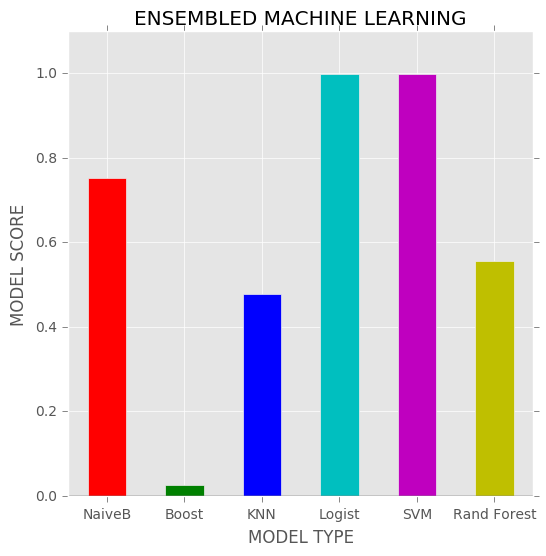

('BEST MODELS:', [['Logit', 0.9979]])


In [50]:
plt.figure(figsize=(6,6))
plt.title("ENSEMBLED MACHINE LEARNING")
plt.ylabel('MODEL SCORE')
plt.xlabel('MODEL TYPE')
my_colors = 'rgbcmyk'
s2.plot( kind='bar', color=my_colors)
plt.axhline(0, color='black')
plt.xticks(rotation=0)
plt.ylim(0,1.1)
plt.show()

print('BEST MODELS:',best2) 